## Some boring imports

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
sys.path.append('../tests')
from utils import get_testdata_path, get_tmp_path

import numpy as np
from skimage.transform import warp
from matplotlib import pyplot as plt
from pyproj import CRS
import rasterio as rio
from pyspatialkit.storage.geostorage import GeoStorage
from pyspatialkit.dataobjects.georaster import GeoRaster
from pyspatialkit.spacedescriptors.georect import GeoRect
from pyspatialkit.storage.raster.georasterlayer import GeoRasterLayer
from pyspatialkit.crs.geocrs import NoneCRS, GeoCrs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## We got some aerial images to play with

### 1. load them

In [5]:
raster1 = GeoRaster.from_file(get_testdata_path() / "dop100rgbi_32_734_5748_2_st_2020.tif", band=[1,2,3])
raster2 = GeoRaster.from_file(get_testdata_path() / "dop100rgbi_32_736_5748_2_st_2020.tif", band=[1,2,3])

### 2. take a look

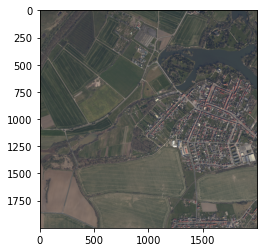

In [6]:
raster1.plot()

## We want to merge the into one integrated storage

### 1. Create the storage

In [7]:
storage = GeoStorage(directory_path=get_tmp_path() / 'geostorage')

### 2. Maybe we want to work in a different coordinate reference system (crs), lets tranform them to epsg:3857 (e.g. used for google maps)

In [8]:
web_crs = GeoCrs(CRS.from_epsg(3857))
raster1.to_crs(web_crs)
raster2.to_crs(web_crs)

### 3. create a layer in our integrated storage and call it MyCoolAerialData

In [9]:
raster_layer = storage.add_raster_layer('MyCoolAerialData', 3, raster1.dtype, crs=raster1.crs, bounds=[-20026377, -20026377, 20048967, 20048967])

### 4. Dump our images into our new layer (takes some time to generate image pyramids for faster read access later on)

In [10]:
raster_layer.writer_raster_data(raster1)
raster_layer.writer_raster_data(raster2)

got bounds:[1379969 6769962 1383346 6773348]
to Indexes:[13275619 21406346 13279005 21409723]
db request took: 0.10213923454284668
backend request took: 0.10285735130310059
aligned
(3386, 3377)
got bounds:[1379969 6769962 1383346 6773348]
to Indexes:[13275619 21406346 13279005 21409723]
[13275618 21406346 13279006 21409724]
(3388, 3378, 3)
[ 6637808 10703172  6639504 10704862]
(1696, 1690, 3)
[3318904 5351586 3319752 5352432]
(848, 846, 3)
[1659452 2675792 1659876 2676216]
(424, 424, 3)
[ 829726 1337896  829938 1338108]
(212, 212, 3)
[414862 668948 414970 669054]
(108, 106, 3)
[207430 334474 207486 334528]
(56, 54, 3)
[103714 167236 103744 167264]
(30, 28, 3)
[51856 83618 51872 83632]
(16, 14, 3)
[25928 41808 25936 41816]
(8, 8, 3)
[12964 20904 12968 20908]
(4, 4, 3)
[ 6482 10452  6484 10454]
(2, 2, 3)
[3240 5226 3242 5228]
(2, 2, 3)
[1620 2612 1622 2614]
(2, 2, 3)
[ 810 1306  812 1308]
(2, 2, 3)
[404 652 406 654]
(2, 2, 3)
[202 326 204 328]
(2, 2, 3)
[100 162 102 164]
(2, 2, 3)
[50 80

### That's it! Lets query a region spanning both images to see whether everything worked as expected

### 1. Define the region to query (any crs can be used)

In [11]:
bounds_rect = GeoRect.from_bounds([*raster1.georect.get_bounds()[:2], *raster2.georect.get_bounds()[2:]], crs=raster1.crs)

### 2. Query the region and plot it

got bounds:[1379969 6769962 1386573 6773197]
to Indexes:[13275770 21406346 13279005 21412950]
db request took: 0.3361210823059082
backend request took: 0.33745503425598145
aligned
(3235, 6604)
reshape aligned
resize took: 0.1535329818725586


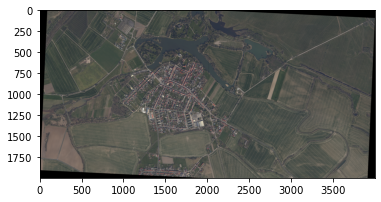

In [12]:
res = raster_layer.get_raster_for_rect(bounds_rect, no_data_value=int(0), resolution_rc=(2000,4000))
res.plot()

### Looks good!

### But not very interactive...

### ...Let's plot it on a digital globe in 3D !

In [13]:
storage.plot_cesium()

INFO:     Started server process [482]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8080 (Press CTRL+C to quit)


STARTING SERVER
INFO:     127.0.0.1:48418 - "GET /static/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:48422 - "GET /static/build/bundle.js HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:48422 - "GET /Widgets/Timeline/Timeline.css HTTP/1.1" 200 OK
INFO:     127.0.0.1:48418 - "GET /Widgets/Viewer/Viewer.css HTTP/1.1" 200 OK
INFO:     127.0.0.1:48430 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:48440 - "GET /backend/layers HTTP/1.1" 200 OK
INFO:     127.0.0.1:48440 - "GET /backend/layers HTTP/1.1" 200 OK
WMS-REQUEST
got bounds:[ -20037508 -242528680          0  242528680]
to Indexes:[-222479713     -11131  262577647   20026377]
db request took: 0.46684694290161133
backend request took: 0.47858214378356934
aligned
(7400, 305)
reshape aligned
resize took: 0.002700328826904297
0
BOUNDS: [-180.0, -90.0, 0.0, 90.0]
BOUNDS TRANSFORMED: (-20037508.342789244, -242528680.94374272, 0.0, 242528680.94374272)
RESOLUTION: (256, 256)
/workspaces/pyspatialkit/tests/tmp/geostorage/MyCoolAerial

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/opt/conda/envs/env/lib/python3.7/site-packages/uvicorn/protocols/http/h11_impl.py", line 373, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/opt/conda/envs/env/lib/python3.7/site-packages/uvicorn/middleware/proxy_headers.py", line 75, in __call__
    return await self.app(scope, receive, send)
  File "/opt/conda/envs/env/lib/python3.7/site-packages/fastapi/applications.py", line 208, in __call__
    await super().__call__(scope, receive, send)
  File "/opt/conda/envs/env/lib/python3.7/site-packages/starlette/applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/opt/conda/envs/env/lib/python3.7/site-packages/starlette/middleware/errors.py", line 181, in __call__
    raise exc
  File "/opt/conda/envs/env/lib/python3.7/site-packages/starlette/middleware/errors.py", line 159, in __call__
    await self.app(scope, receive, _se

WMS-REQUEST
got bounds:[1382440 6771807 1382592 6772054]
to Indexes:[13276913 21408817 13277160 21408969]
db request took: 0.026981115341186523
backend request took: 0.028263568878173828
aligned
(247, 152)
reshape aligned
resize took: 0.0016362667083740234
18508438
BOUNDS: [12.418670654296864, 51.843109130859375, 12.420043945312512, 51.844482421875]
BOUNDS TRANSFORMED: (1382440.0935656966, 6771807.13403495, 1382592.9676222694, 6772054.580126769)
RESOLUTION: (256, 256)
/workspaces/pyspatialkit/tests/tmp/geostorage/MyCoolAerialData
get_raster_for_rect(..) took 0.038115739822387695 seconds
Whole wms request took 0.06066131591796875 seconds.


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [482]
